In [11]:
# IoT Temperature Analysis and Forecasting Using Machine Learning
# Project Step 1: Descriptive Analysis, Pre-processing, Problem Formalization, and Baseline Model

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [19]:
# ============================================================================
# 2. LOAD DATASET
# ============================================================================

# Load the dataset
df = pd.read_csv('IOT-temp.csv')

print("=" * 80)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 80)

DATASET LOADED SUCCESSFULLY


In [23]:
# ============================================================================
# 3. DESCRIPTIVE ANALYSIS
# ============================================================================


print("3.1 BASIC INFORMATION")


# Display basic information
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\n Column Names and Types ")
print(df.dtypes)

print("\n First 5 Rows ")
print(df.head())

print("\n Last 5 Rows ")
print(df.tail())

print("\n Dataset Info ")
df.info()

3.1 BASIC INFORMATION

Dataset Shape: (97606, 5)
Number of Rows: 97606
Number of Columns: 5

 Column Names and Types 
id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

 First 5 Rows 
                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  

 Last 5 Rows 
                                        id  room_id/id        noted_date  \
97601   __export__.temp_log_91076_7fbd08ca  Room Admin  28-07-2018 07:07   
97602  __export__.temp_log_147733_62c03f31  R

In [26]:

print("3.2 STATISTICAL SUMMARY")

# Statistical description
print("\n Descriptive Statistics ")
print(df.describe())

# Check for missing values
print("\n Missing Values ")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("No missing values detected in the dataset!")

# Check for duplicates
print("\n Duplicate Rows ")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

3.2 STATISTICAL SUMMARY

 Descriptive Statistics 
               temp
count  97606.000000
mean      35.053931
std        5.699825
min       21.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       51.000000

 Missing Values 
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
No missing values detected in the dataset!

 Duplicate Rows 
Number of duplicate rows: 1


In [28]:

print("3.3 VARIABLE DEFINITION AND ANALYSIS")

# Analyze each column
for col in df.columns:
    print(f"\n Column: {col} ")
    print(f"Data Type: {df[col].dtype}")
    print(f"Unique Values: {df[col].nunique()}")

    if df[col].dtype in ['int64', 'float64']:
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")
        print(f"Mean: {df[col].mean():.2f}")
        print(f"Median: {df[col].median():.2f}")
        print(f"Std Dev: {df[col].std():.2f}")
    else:
        print(f"Sample Values: {df[col].unique()[:5]}")

3.3 VARIABLE DEFINITION AND ANALYSIS

 Column: id 
Data Type: object
Unique Values: 97605
Sample Values: ['__export__.temp_log_196134_bd201015'
 '__export__.temp_log_196131_7bca51bc'
 '__export__.temp_log_196127_522915e3'
 '__export__.temp_log_196128_be0919cf'
 '__export__.temp_log_196126_d30b72fb']

 Column: room_id/id 
Data Type: object
Unique Values: 1
Sample Values: ['Room Admin']

 Column: noted_date 
Data Type: object
Unique Values: 27920
Sample Values: ['08-12-2018 09:30' '08-12-2018 09:29' '08-12-2018 09:28'
 '08-12-2018 09:26' '08-12-2018 09:25']

 Column: temp 
Data Type: int64
Unique Values: 31
Min: 21
Max: 51
Mean: 35.05
Median: 35.00
Std Dev: 5.70

 Column: out/in 
Data Type: object
Unique Values: 2
Sample Values: ['In' 'Out']


3.4 DATA VISUALIZATION


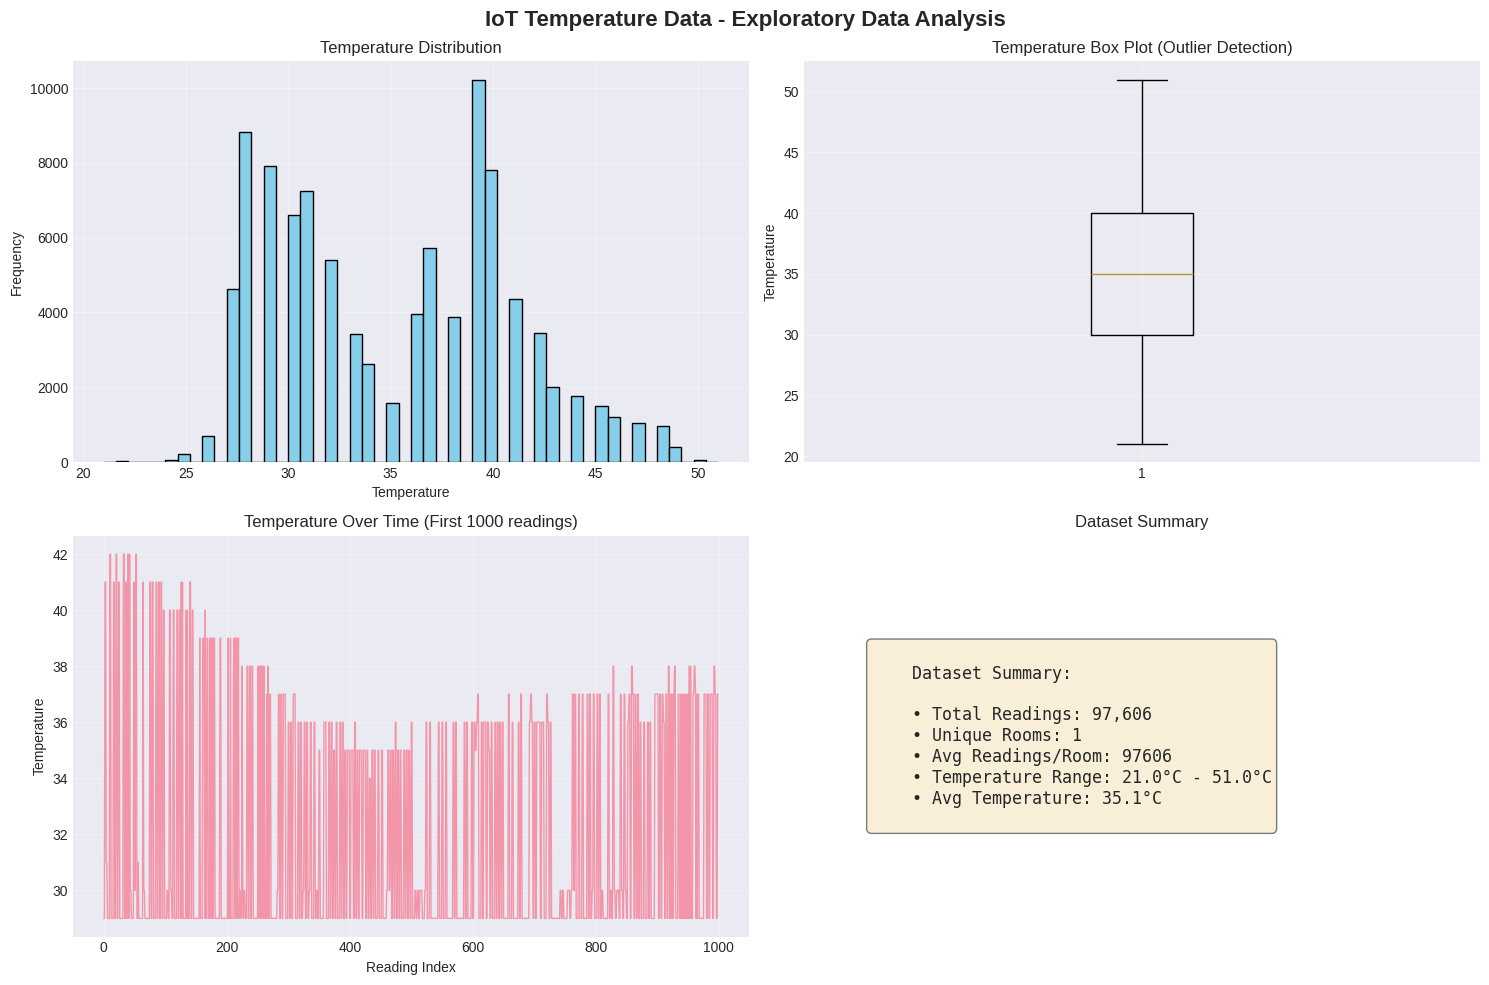

In [30]:

print("3.4 DATA VISUALIZATION")

#visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('IoT Temperature Data - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Distribution of temperature
if 'temp' in df.columns:
    axes[0, 0].hist(df['temp'], bins=50, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution')
    axes[0, 0].set_xlabel('Temperature')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Box plot for outlier detection
if 'temp' in df.columns:
    axes[0, 1].boxplot(df['temp'], vert=True)
    axes[0, 1].set_title('Temperature Box Plot (Outlier Detection)')
    axes[0, 1].set_ylabel('Temperature')
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Temperature over time or index
if 'temp' in df.columns:
    axes[1, 0].plot(df.index[:1000], df['temp'][:1000], linewidth=1, alpha=0.7)
    axes[1, 0].set_title('Temperature Over Time (First 1000 readings)')
    axes[1, 0].set_xlabel('Reading Index')
    axes[1, 0].set_ylabel('Temperature')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Summary statistics
if 'room_id/id' in df.columns:
    n_rooms = df['room_id/id'].nunique()
    total_readings = len(df)
    avg_per_room = total_readings / n_rooms

    axes[1, 1].axis('off')
    summary_text = f"""
    Dataset Summary:

    • Total Readings: {total_readings:,}
    • Unique Rooms: {n_rooms}
    • Avg Readings/Room: {avg_per_room:.0f}
    • Temperature Range: {df['temp'].min():.1f}°C - {df['temp'].max():.1f}°C
    • Avg Temperature: {df['temp'].mean():.1f}°C
    """
    axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12,
                    verticalalignment='center', family='monospace',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[1, 1].set_title('Dataset Summary')
plt.tight_layout()
plt.show()

In [32]:

print("3.5 CORRELATION ANALYSIS")

# We select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    # Correlation matrix
    correlation_matrix = df[numeric_cols].corr()
    print("\n Correlation Matrix ")
    print(correlation_matrix)

    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis")

3.5 CORRELATION ANALYSIS
Not enough numeric columns for correlation analysis


In [33]:
# ============================================================================
# 4. DATA PRE-PROCESSING
# ============================================================================

print("4. DATA PRE-PROCESSING")

# We create a copy for processing
df_processed = df.copy()

print("\n--- 4.1 Handling Missing Values ---")

if df_processed.isnull().sum().sum() > 0:
    print("Missing values detected. Applying imputation strategy...")

    # For numeric columns: fill with median
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"Filled {col} with median: {median_val}")

    # For categorical columns: fill with mode
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} with mode: {mode_val}")
else:
    print("No missing values to handle.")

4. DATA PRE-PROCESSING

--- 4.1 Handling Missing Values ---
No missing values to handle.


In [35]:
print("\n 4.2 Handling Duplicates ")

duplicates_before = df_processed.duplicated().sum()
if duplicates_before > 0:
    print(f"Removing {duplicates_before} duplicate rows...")
    df_processed = df_processed.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df_processed.shape}")
else:
    print("No duplicates found.")


 4.2 Handling Duplicates 
No duplicates found.


In [36]:

print("\n 4.3 Handling Outliers ")

# Detect outliers using IQR method for temperature
if 'temp' in df_processed.columns:
    Q1 = df_processed['temp'].quantile(0.25)
    Q3 = df_processed['temp'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_processed[(df_processed['temp'] < lower_bound) |
                           (df_processed['temp'] > upper_bound)]

    print(f"\nOutlier Detection Results:")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers detected: {len(outliers)} ({len(outliers)/len(df_processed)*100:.2f}%)")

    # Decision: Keep outliers for now (they might be legitimate temperature readings)
    print("\nDecision: Keeping outliers as they may represent legitimate temperature variations")


 4.3 Handling Outliers 

Outlier Detection Results:
Q1 (25th percentile): 30.00
Q3 (75th percentile): 40.00
IQR: 10.00
Lower Bound: 15.00
Upper Bound: 55.00
Number of outliers detected: 0 (0.00%)

Decision: Keeping outliers as they may represent legitimate temperature variations


In [37]:
print("\n--- 4.4 Feature Engineering ---")

# If timestamp exists, extract temporal features
if 'noted_date' in df_processed.columns:
    print("\nExtracting temporal features from timestamp...")

    # Convert to datetime with the correct format (day-month-year hour:minute)
    df_processed['noted_date'] = pd.to_datetime(df_processed['noted_date'],
                                                 format='%d-%m-%Y %H:%M',
                                                 errors='coerce')

    # Check if conversion was successful
    if df_processed['noted_date'].isnull().sum() > 0:
        print(f"⚠ Warning: {df_processed['noted_date'].isnull().sum()} dates could not be parsed")

    df_processed['year'] = df_processed['noted_date'].dt.year
    df_processed['month'] = df_processed['noted_date'].dt.month
    df_processed['day'] = df_processed['noted_date'].dt.day
    df_processed['hour'] = df_processed['noted_date'].dt.hour
    df_processed['dayofweek'] = df_processed['noted_date'].dt.dayofweek

    print("Temporal features created: year, month, day, hour, dayofweek")
    print(f"Date range: {df_processed['noted_date'].min()} to {df_processed['noted_date'].max()}")


--- 4.4 Feature Engineering ---

Extracting temporal features from timestamp...
Temporal features created: year, month, day, hour, dayofweek
Date range: 2018-07-28 07:06:00 to 2018-12-08 09:30:00


In [38]:
print("\n 4.5 Encoding Categorical Variables ")

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
# Remove date column if present
categorical_cols = [col for col in categorical_cols if 'date' not in col.lower()]

if len(categorical_cols) > 0:
    print(f"\nCategorical columns found: {categorical_cols}")

    # Apply Label Encoding for room_id/id if exists
    if 'room_id/id' in df_processed.columns:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df_processed['room_id_encoded'] = le.fit_transform(df_processed['room_id/id'])
        print(f"Label encoded 'room_id/id' -> 'room_id_encoded'")
else:
    print("No categorical variables to encode")


--- 4.5 Encoding Categorical Variables ---

Categorical columns found: ['id', 'room_id/id', 'out/in']
Label encoded 'room_id/id' -> 'room_id_encoded'


In [39]:
print("\n 4.6 Data Quality Summary After Pre-processing ")

print(f"\nFinal Dataset Shape: {df_processed.shape}")
print(f"Missing Values: {df_processed.isnull().sum().sum()}")
print(f"Duplicate Rows: {df_processed.duplicated().sum()}")

print("\n--- Processed Dataset Info ---")
df_processed.info()


 4.6 Data Quality Summary After Pre-processing 

Final Dataset Shape: (97605, 11)
Missing Values: 0
Duplicate Rows: 0

--- Processed Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 97605 entries, 0 to 97605
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               97605 non-null  object        
 1   room_id/id       97605 non-null  object        
 2   noted_date       97605 non-null  datetime64[ns]
 3   temp             97605 non-null  int64         
 4   out/in           97605 non-null  object        
 5   year             97605 non-null  int32         
 6   month            97605 non-null  int32         
 7   day              97605 non-null  int32         
 8   hour             97605 non-null  int32         
 9   dayofweek        97605 non-null  int32         
 10  room_id_encoded  97605 non-null  int64         
dtypes: datetime64[ns](1), int32(5), int64(2), object(3)

In [42]:

# 5. PROBLEM FORMALIZATION

print("5. PROBLEM FORMALIZATION")

print("""
BUSINESS CASE:

IoT devices are increasingly used to monitor environmental conditions in buildings,
smart homes, and industrial settings. Temperature is a critical parameter that needs
to be monitored and predicted for:
- Energy efficiency optimization
- Anomaly detection (equipment failure, sensor malfunction)
- Predictive maintenance
- Climate control optimization

PROJECT OBJECTIVE:

1. Analyze temperature patterns from IoT sensor readings
2. Build predictive models to forecast future temperature values
3. Detect anomalies in temperature readings
4. Understand factors influencing temperature variations

PROBLEM TYPE:

- Primary Task: REGRESSION (Temperature Prediction)
- Secondary Task: Time Series Forecasting
- Tertiary Task: Anomaly Detection (Classification)

TARGET VARIABLE:

- Temperature (continuous variable)

FEATURES:

- Temporal features: timestamp, hour, day, month, etc.
- Device/Location features: room_id/id
- Historical temperature values (for time series models)

EVALUATION METRICS:

- Mean Absolute Error (MAE): Average absolute difference between predicted and actual
- Mean Squared Error (MSE): Penalizes larger errors more heavily
- Root Mean Squared Error (RMSE): Same unit as target variable
- R² Score: Proportion of variance explained by the model
- Mean Absolute Percentage Error (MAPE): Percentage error measure

CHALLENGES:

1. Time series nature of the data
2. Potential seasonality and trends
3. Multiple devices/rooms with different patterns
4. Outlier detection and handling
5. Model selection for time-dependent data
""")

5. PROBLEM FORMALIZATION

BUSINESS CASE:

IoT devices are increasingly used to monitor environmental conditions in buildings,
smart homes, and industrial settings. Temperature is a critical parameter that needs
to be monitored and predicted for:
- Energy efficiency optimization
- Anomaly detection (equipment failure, sensor malfunction)
- Predictive maintenance
- Climate control optimization

PROJECT OBJECTIVE:

1. Analyze temperature patterns from IoT sensor readings
2. Build predictive models to forecast future temperature values
3. Detect anomalies in temperature readings
4. Understand factors influencing temperature variations

PROBLEM TYPE:

- Primary Task: REGRESSION (Temperature Prediction)
- Secondary Task: Time Series Forecasting
- Tertiary Task: Anomaly Detection (Classification)

TARGET VARIABLE:

- Temperature (continuous variable)

FEATURES:

- Temporal features: timestamp, hour, day, month, etc.
- Device/Location features: room_id/id
- Historical temperature values (for t

In [44]:
# 6. BASELINE MODEL IMPLEMENTATION

print("6. BASELINE MODEL IMPLEMENTATION")

print("""
BASELINE MODEL SELECTION:
We will implement two baseline models:
1. Linear Regression: Simple, interpretable, serves as performance benchmark
2. Random Forest Regressor: Non-linear, handles feature interactions

Both models will predict temperature based on available features.
""")

6. BASELINE MODEL IMPLEMENTATION

BASELINE MODEL SELECTION:
We will implement two baseline models:
1. Linear Regression: Simple, interpretable, serves as performance benchmark
2. Random Forest Regressor: Non-linear, handles feature interactions

Both models will predict temperature based on available features.



In [45]:
print("\n--- 6.1 Feature Selection and Preparation ---")


# Define features for the model
feature_cols = []

# Add temporal features if they exist
temporal_features = ['hour', 'day', 'month', 'dayofweek', 'year']
for feat in temporal_features:
    if feat in df_processed.columns:
        feature_cols.append(feat)

# Add encoded room_id if exists
if 'room_id_encoded' in df_processed.columns:
    feature_cols.append('room_id_encoded')

# Add any other numeric features (excluding target)
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
for feat in numeric_features:
    if feat not in feature_cols and feat != 'temp' and 'id' not in feat.lower():
        feature_cols.append(feat)

print(f"\nSelected Features for Modeling: {feature_cols}")


--- 6.1 Feature Selection and Preparation ---

Selected Features for Modeling: ['hour', 'day', 'month', 'dayofweek', 'year', 'room_id_encoded']


In [46]:
# Prepare feature matrix and target vector
if 'temp' in df_processed.columns and len(feature_cols) > 0:
    X = df_processed[feature_cols].copy()
    y = df_processed['temp'].copy()

    # Handle any remaining NaN values
    X = X.fillna(X.median())

    print(f"\nFeature Matrix Shape: {X.shape}")
    print(f"Target Vector Shape: {y.shape}")


Feature Matrix Shape: (97605, 6)
Target Vector Shape: (97605,)


In [50]:
print("\n--- 6.2 Train-Test Split ---")

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining Set Size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing Set Size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


--- 6.2 Train-Test Split ---

Training Set Size: 78084 samples (80.0%)
Testing Set Size: 19521 samples (20.0%)


In [51]:
print("\n--- 6.3 Feature Scaling ---")

# Standardize features (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler (mean=0, std=1)")


--- 6.3 Feature Scaling ---
Features scaled using StandardScaler (mean=0, std=1)


In [53]:
print("\n--- 6.4 Model Training ---")

# Baseline Model 1: Linear Regression
print("\n1 Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print(" Linear Regression trained successfully")

# Baseline Model 2: Random Forest
print("\n2 Training Random Forest Regressor...")
rf_model = RandomForestRegressor(
n_estimators=100,
max_depth=10,
min_samples_split=5,
random_state=42,
n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest trained successfully")


--- 6.4 Model Training ---

1 Training Linear Regression Model...
 Linear Regression trained successfully

2 Training Random Forest Regressor...
Random Forest trained successfully


In [57]:
print("\n--- 6.5 Model Evaluation ---")

# Function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} Performance:")
    print("-" * 50)
    print(f"Mean Absolute Error (MAE):       {mae:.4f}")
    print(f"Mean Squared Error (MSE):        {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
    print(f"R² Score:                        {r2:.4f}")
    print(f"Mean Absolute Percentage Error:  {mape:.2f}%")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}


--- 6.5 Model Evaluation ---


In [61]:
# Evaluate Linear Regression
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)


print("LINEAR REGRESSION RESULTS")
lr_train_metrics = evaluate_model(y_train, lr_train_pred, "Training Set")
lr_test_metrics = evaluate_model(y_test, lr_test_pred, "Testing Set")

# Evaluate Random Forest
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

print("\nRANDOM FOREST RESULTS")
rf_train_metrics = evaluate_model(y_train, rf_train_pred, "Training Set")
rf_test_metrics = evaluate_model(y_test, rf_test_pred, "Testing Set")

LINEAR REGRESSION RESULTS

Training Set Performance:
--------------------------------------------------
Mean Absolute Error (MAE):       3.3876
Mean Squared Error (MSE):        19.3369
Root Mean Squared Error (RMSE):  4.3974
R² Score:                        0.4050
Mean Absolute Percentage Error:  9.78%

Testing Set Performance:
--------------------------------------------------
Mean Absolute Error (MAE):       3.3768
Mean Squared Error (MSE):        19.0485
Root Mean Squared Error (RMSE):  4.3645
R² Score:                        0.4128
Mean Absolute Percentage Error:  9.73%

RANDOM FOREST RESULTS

Training Set Performance:
--------------------------------------------------
Mean Absolute Error (MAE):       1.3869
Mean Squared Error (MSE):        6.3428
Root Mean Squared Error (RMSE):  2.5185
R² Score:                        0.8048
Mean Absolute Percentage Error:  3.99%

Testing Set Performance:
--------------------------------------------------
Mean Absolute Error (MAE):       1.3819
Me

In [62]:
print("\n--- 6.6 Model Comparison ---")

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train_R2': [lr_train_metrics['R2'], rf_train_metrics['R2']],
    'Test_R2': [lr_test_metrics['R2'], rf_test_metrics['R2']],
    'Train_RMSE': [lr_train_metrics['RMSE'], rf_train_metrics['RMSE']],
    'Test_RMSE': [lr_test_metrics['RMSE'], rf_test_metrics['RMSE']],
    'Train_MAE': [lr_train_metrics['MAE'], rf_train_metrics['MAE']],
    'Test_MAE': [lr_test_metrics['MAE'], rf_test_metrics['MAE']]
})

print("MODEL COMPARISON SUMMARY")
print(comparison_df.to_string(index=False))

# Check for overfitting
print("\n--- Overfitting Analysis ---")
lr_overfit = lr_train_metrics['R2'] - lr_test_metrics['R2']
rf_overfit = rf_train_metrics['R2'] - rf_test_metrics['R2']

print(f"Linear Regression R² Gap (Train - Test): {lr_overfit:.4f}")
print(f"Random Forest R² Gap (Train - Test): {rf_overfit:.4f}")

if rf_overfit > 0.1:
    print(" Random Forest shows signs of overfitting (large train-test gap)")
else:
    print(" Models show acceptable generalization")


--- 6.6 Model Comparison ---
MODEL COMPARISON SUMMARY
            Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE
Linear Regression  0.404980 0.412801    4.397379   4.364456   3.387607  3.376804
    Random Forest  0.804826 0.804354    2.518487   2.519258   1.386858  1.381871

--- Overfitting Analysis ---
Linear Regression R² Gap (Train - Test): -0.0078
Random Forest R² Gap (Train - Test): 0.0005
 Models show acceptable generalization



--- 6.7 Predictions Visualization ---


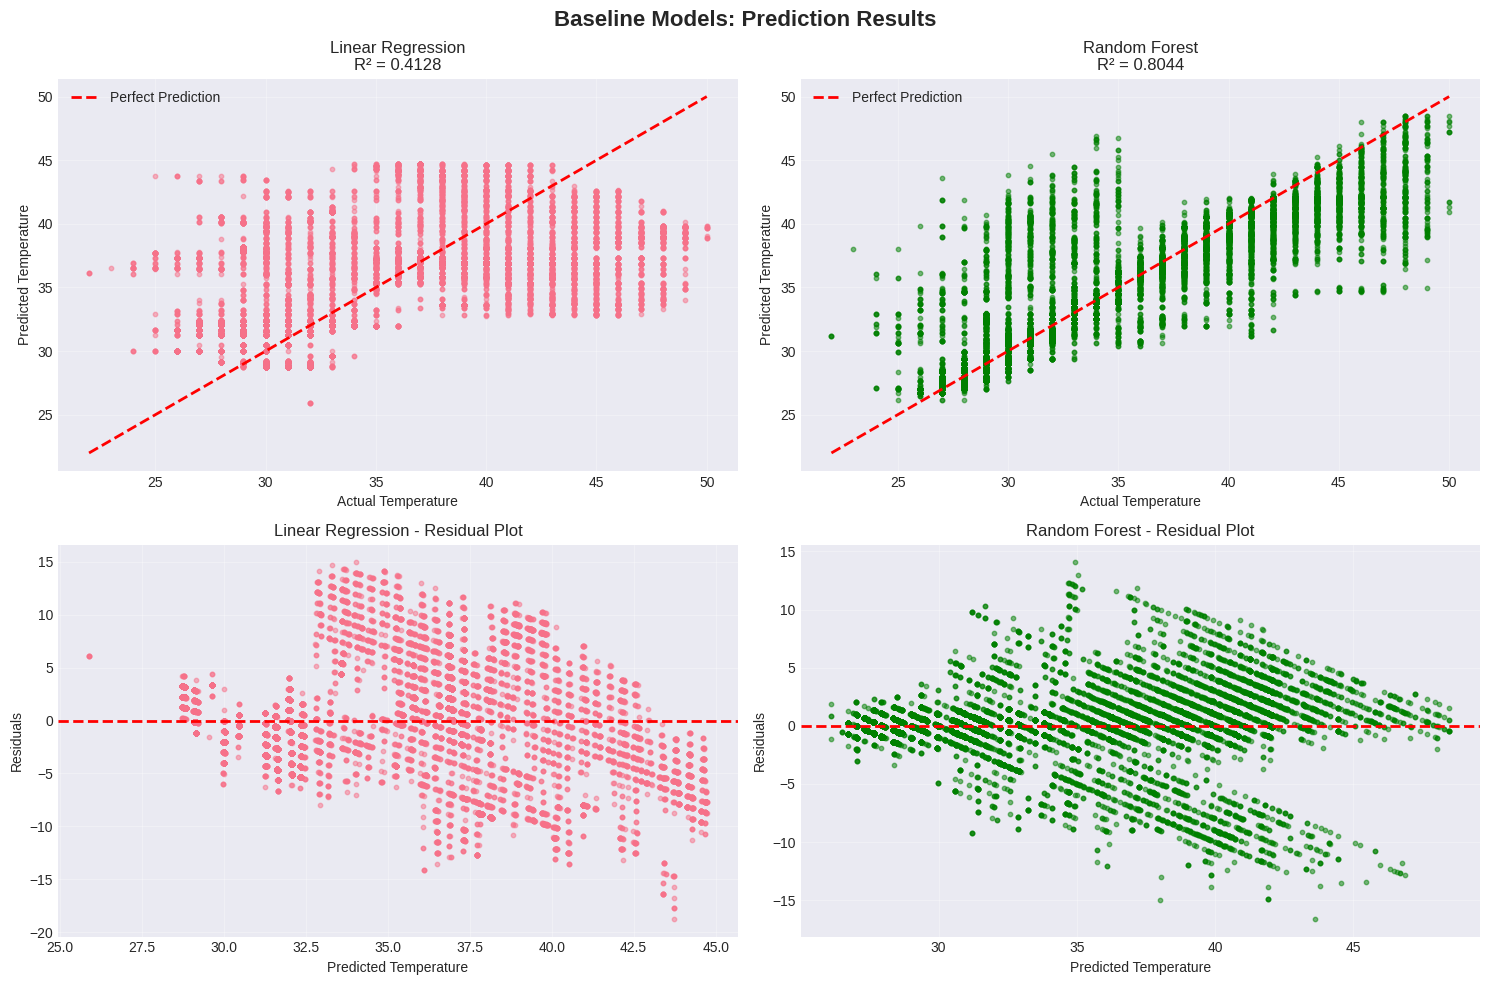


--- Random Forest Feature Importance ---
        Feature  Importance
            day    0.600315
          month    0.286762
           hour    0.080060
      dayofweek    0.032864
           year    0.000000
room_id_encoded    0.000000


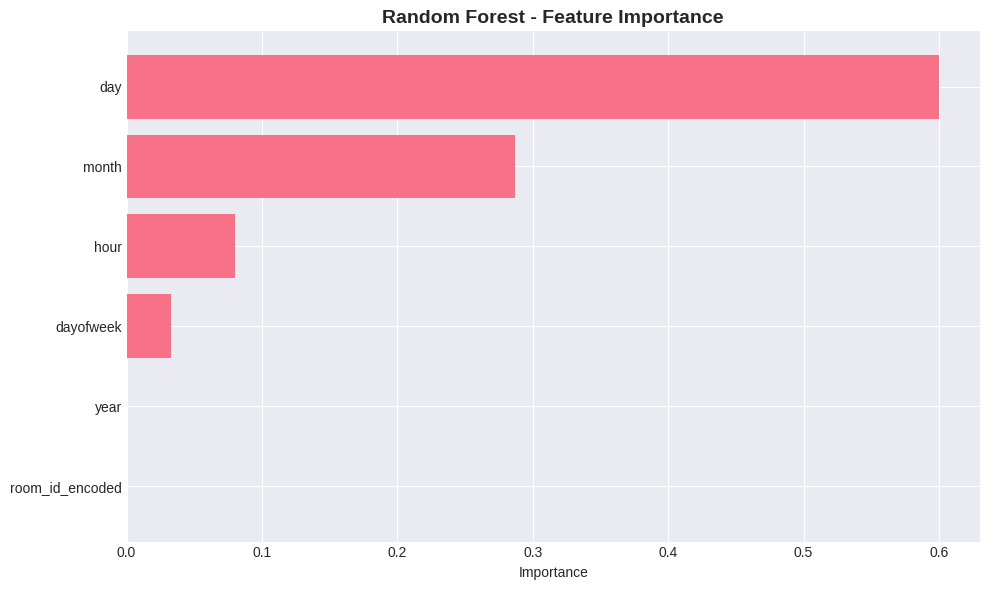

In [63]:
print("\n--- 6.7 Predictions Visualization ---")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Baseline Models: Prediction Results', fontsize=16, fontweight='bold')

# Plot 1: Linear Regression - Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, lr_test_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()],
                    [y_test.min(), y_test.max()],
                    'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Temperature')
axes[0, 0].set_ylabel('Predicted Temperature')
axes[0, 0].set_title(f'Linear Regression\nR² = {lr_test_metrics["R2"]:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Random Forest - Actual vs Predicted (Test Set)
axes[0, 1].scatter(y_test, rf_test_pred, alpha=0.5, s=10, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Temperature')
axes[0, 1].set_ylabel('Predicted Temperature')
axes[0, 1].set_title(f'Random Forest\nR² = {rf_test_metrics["R2"]:.4f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals - Linear Regression
lr_residuals = y_test - lr_test_pred
axes[1, 0].scatter(lr_test_pred, lr_residuals, alpha=0.5, s=10)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Temperature')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Linear Regression - Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residuals - Random Forest
rf_residuals = y_test - rf_test_pred
axes[1, 1].scatter(rf_test_pred, rf_residuals, alpha=0.5, s=10, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Temperature')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Random Forest - Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
if len(feature_cols) > 0:
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n--- Random Forest Feature Importance ---")
    print(feature_importance.to_string(index=False))

# Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

else:
    print("ERROR: 'temp' column not found or no features available for modeling")

In [64]:
# 7. CONCLUSION AND NEXT STEPS

print("7. CONCLUSION AND NEXT STEPS")

print("""
SUMMARY OF STEP 1:
Dataset successfully loaded and analyzed
Descriptive statistics and visualizations completed
Data pre-processing implemented (missing values, duplicates, outliers)
Problem formalized as a regression task
Two baseline models trained and evaluated

KEY FINDINGS:

1. Dataset characteristics identified
2. Temporal patterns observed in temperature readings
3. Baseline model performance established
4. Feature importance identified

""")



7. CONCLUSION AND NEXT STEPS

SUMMARY OF STEP 1:
Dataset successfully loaded and analyzed
Descriptive statistics and visualizations completed
Data pre-processing implemented (missing values, duplicates, outliers)
Problem formalized as a regression task
Two baseline models trained and evaluated

KEY FINDINGS:

1. Dataset characteristics identified
2. Temporal patterns observed in temperature readings
3. Baseline model performance established
4. Feature importance identified


